In [1]:
import pandas as pd # dataframes
import re  # regex / string manipulation
import string   # getting rid of fancy symbols
import unidecode # getting rid of fancy symbols
import random


lyrics_df = pd.read_csv('lyrics-data.csv')

# only considering rows with english songs
lyrics_df = lyrics_df[lyrics_df.language == 'en']  
print(len(lyrics_df))

# removing any NaN values from the lyrics column:
lyrics_df = lyrics_df[lyrics_df.Lyric.notnull()]
lyrics_df = lyrics_df[lyrics_df.SName.notnull()]
print(len(lyrics_df))

# resetting the index to start from 1 2 3...
lyrics_df = lyrics_df.reset_index()

# removing unwanted columns:
lyrics_df = lyrics_df.drop(['index','SLink','language'], axis=1)


# Convert "Artist and Genres" from object to string:
lyrics_df = lyrics_df.astype({'ALink':'string'})
lyrics_df = lyrics_df.astype({'SName':'string'})
lyrics_df = lyrics_df.astype({'Lyric':'string'})

# cleaning up the names in the ALink column for matching later:
lyrics_df['ALink'] = lyrics_df['ALink'].str.replace('/', '')
lyrics_df['ALink'] = lyrics_df['ALink'].str.replace('-', ' ')

#finding out the types of each column:
print(lyrics_df.info())
display(lyrics_df.head(10))

191814
191812
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191812 entries, 0 to 191811
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   191812 non-null  string
 1   SName   191812 non-null  string
 2   Lyric   191812 non-null  string
dtypes: string(3)
memory usage: 4.4 MB
None


,ALink,SName,Lyric
0,ivete sangalo,Careless Whisper,I feel so unsure As I take your hand and lead ...
1,ivete sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya Or even try to school,..."
2,ivete sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here Don't be co..."
3,ivete sangalo,Easy,"Know it sounds funny But, I just can't stand t..."
4,ivete sangalo,For Your Babies (The Voice cover),You've got that look again The one I hoped I h...
5,ivete sangalo,Human Nature,Looking out Across the night time The city win...
6,ivete sangalo,Losing Control (Miss Cady feat. Ivete Sangalo),"Uh, yeah. Go, go, go. Uh, yeah. Uh, Uh, Uhh. ..."
7,ivete sangalo,Master Blaster (Jammin'),Everyone's feeling pretty It's hotter than Jul...
8,ivete sangalo,More Than Words,Saying 'I Love you' Is not the words I want to...
9,ivete sangalo,Natural Collie,Been down in the valley Smoking natural collie...


In [2]:
# import the artist.csv
artists_df = pd.read_csv('artists-data.csv')

# removing unwanted columns:
artists_df = artists_df.drop(['Songs','Popularity','Link'], axis=1)

# removing any NaN values from the Genres column:
artists_df = artists_df[artists_df.Genres.notnull()]


# Convert "Artist and Genres" from object to string:
artists_df = artists_df.astype({'Artist':'string'})
artists_df = artists_df.astype({'Genres':'string'})

#finding out the types of each column:
print(artists_df.info())

display(artists_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4163 entries, 0 to 4167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  4163 non-null   string
 1   Genres  4163 non-null   string
dtypes: string(2)
memory usage: 97.6 KB
None


,Artist,Genres
0,Ivete Sangalo,Pop; Axé; Romântico
1,Chiclete com Banana,Axé
2,Banda Eva,Axé; Romântico; Reggae
3,É O Tchan,Axé
4,Claudia Leitte,Pop; Axé; Romântico
...,...,...
4163,Miriam Makeba,World Music; Black Music; Blues
4164,Freddie Aguilar,World Music
4165,Amadou & Mariam,World Music
4166,Magic System,World Music; Gospel/Religioso


In [3]:

# changing the Genres to lower case for simpler text comparison:
artists_df['Genres'] = artists_df['Genres'].str.lower()

#genres we care about:
pattern = 'rock|pop|hip hop|metal|country|r&b'

#reducing the dataframe down to entries that have at least one of the genres from 'pattern':
artists_df = artists_df[artists_df['Genres'].str.contains(pattern)]
display(artists_df)


,Artist,Genres
0,Ivete Sangalo,pop; axé; romântico
4,Claudia Leitte,pop; axé; romântico
6,Ara Ketu,axé; pop
19,Babado Novo,axé; pop; romântico
27,Banda Beijo,axé; dance; pop/rock
...,...,...
4125,Uma Banda Lá em Casa,trilha sonora; pop; pop/rock
4130,Azumanga Daioh,trilha sonora; j-pop/j-rock
4133,Smoke City,trip-hop; blues; hip hop
4136,Lamb,trip-hop; soft rock; tecnopop


In [4]:

#creating a new dataframe that we will populate with only the genres we care about:
new_artists_df = artists_df.copy()
new_artists_df['Genres'] = ''

# populating the Genres column of new_artists_df with the genres we care about:
for index, row in artists_df.iterrows():

    first = True # boolean for deciding when to add ',' to the value

    if re.search('Rock'.lower(), row['Genres'].lower()):
        new_artists_df.loc[index, 'Genres'] += 'Rock'
        first = False
        
    if re.search('Pop'.lower(), row['Genres'].lower()):
        if(first == False):
            new_artists_df.loc[index, 'Genres'] += ','
        new_artists_df.loc[index, 'Genres'] += 'Pop'
        first = False

    if re.search('Hip Hop'.lower(), row['Genres'].lower()):
        if(first == False):
            new_artists_df.loc[index, 'Genres'] += ','
        new_artists_df.loc[index, 'Genres'] += 'HipHop'
        first = False

    if re.search('Metal'.lower(), row['Genres'].lower()):
        if(first == False):
            new_artists_df.loc[index, 'Genres'] += ','
        new_artists_df.loc[index, 'Genres'] += 'Metal'
        first = False
            
    if re.search('Country'.lower(), row['Genres'].lower()):
        if(first == False):
            new_artists_df.loc[index, 'Genres'] += ','
        new_artists_df.loc[index, 'Genres'] += 'Country'
        first = False
            
    if re.search('R&B'.lower(), row['Genres'].lower()):
        if(first == False):
            new_artists_df.loc[index, 'Genres'] += ','
        new_artists_df.loc[index, 'Genres'] += 'R&B'
        first = False



# resetting the index to start from 1 2 3...
new_artists_df = new_artists_df.reset_index()
# removing the old index column:
new_artists_df = new_artists_df.drop(['index'], axis=1)
display(new_artists_df)


,Artist,Genres
0,Ivete Sangalo,Pop
1,Claudia Leitte,Pop
2,Ara Ketu,Pop
3,Babado Novo,Pop
4,Banda Beijo,"Rock,Pop"
...,...,...
2234,Uma Banda Lá em Casa,"Rock,Pop"
2235,Azumanga Daioh,"Rock,Pop"
2236,Smoke City,HipHop
2237,Lamb,"Rock,Pop"


In [5]:

# I need to now get the artists column to be all lower case and remove the strange characters ('é' for example) with regular ones ('e')

new_artists_df['Artist'] = new_artists_df['Artist'].str.lower()
new_artists_df['Artist'] = new_artists_df['Artist'].str.translate(str.maketrans('', '', string.punctuation)) # removing fancy punctuation

#getting rid of fancy characters:
for index, row in new_artists_df.iterrows():
    new_artists_df.loc[index, 'Artist'] = unidecode.unidecode(row['Artist'])


display(new_artists_df)


,Artist,Genres
0,ivete sangalo,Pop
1,claudia leitte,Pop
2,ara ketu,Pop
3,babado novo,Pop
4,banda beijo,"Rock,Pop"
...,...,...
2234,uma banda la em casa,"Rock,Pop"
2235,azumanga daioh,"Rock,Pop"
2236,smoke city,HipHop
2237,lamb,"Rock,Pop"


In [6]:


#creating a new dataframe that will be the final dataframe with all the info we want:
combined_df = lyrics_df.copy()
combined_df['Genres'] = ''


# building a dictionary from 'new_artists_df':
artists_genres_dict = {}
for index, row in new_artists_df.iterrows():
    artists_genres_dict[new_artists_df.loc[index, 'Artist']] = artists_genres_dict.setdefault(new_artists_df.loc[index, 'Artist'],"") + new_artists_df.loc[index, 'Genres']

# storing the genre(s) in the Genres column of our new dataframe where the artist value of the row exists in the dictionary above (meaning that it is an artist we care about):
for index, row in combined_df.iterrows():
    if combined_df.loc[index,'ALink'] in artists_genres_dict:
        combined_df.loc[index,'Genres'] = artists_genres_dict[combined_df.loc[index,'ALink']]

combined_df = combined_df[combined_df.Genres != '']  # removing rows that have names not in our dictionary (meaning they are genres we dont care about)

# resetting the index to start from 1 2 3...
combined_df = combined_df.reset_index()

# removing the old index column:
combined_df = combined_df.drop(['index'], axis=1)

display(combined_df)


,ALink,SName,Lyric,Genres
0,ivete sangalo,Careless Whisper,I feel so unsure As I take your hand and lead ...,Pop
1,ivete sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya Or even try to school,...",Pop
2,ivete sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here Don't be co...",Pop
3,ivete sangalo,Easy,"Know it sounds funny But, I just can't stand t...",Pop
4,ivete sangalo,For Your Babies (The Voice cover),You've got that look again The one I hoped I h...,Pop
...,...,...,...,...
146161,lamb,This could be heaven,Soon comes soon Sweet so sweet Falling soft Be...,"Rock,Pop"
146162,lamb,Till The Clouds Clear,what's left to say with all that's come and go...,"Rock,Pop"
146163,lamb,Trans fatty acid,No one said it would be easy Did anyone tell y...,"Rock,Pop"
146164,lamb,what sound,What Sound What is that sound Ringing in my e...,"Rock,Pop"


In [7]:
rock_C = 0
pop_C = 0
hiphop_C = 0
metal_C = 0
country_C = 0
RB_C = 0
multiple = 0 # has multiple genres 

# fixing rows that have multiple genres by choosing one of the genres by random:
for index, row in combined_df.iterrows():

    if (row['Genres'].count(',') > 0):
        multiple += 1
        combined_df.loc[index, 'Genres'] = random.choices(str(combined_df.loc[index, 'Genres']).split(','), k = 1)


#getting counts of genres:
for index, row in combined_df.iterrows():
    
    if re.search('Rock'.lower(), row['Genres'].lower()):
        rock_C += 1
        
    if re.search('Pop'.lower(), row['Genres'].lower()):
        pop_C += 1
        
    if re.search('HipHop'.lower(), row['Genres'].lower()):
        hiphop_C += 1
        
    if re.search('Metal'.lower(), row['Genres'].lower()):
        metal_C += 1
    
    if re.search('Country'.lower(), row['Genres'].lower()):
        country_C += 1
        
    if re.search('R&B'.lower(), row['Genres'].lower()):
        RB_C += 1
    


#artists
print(rock_C)
print(pop_C)
print(hiphop_C)
print(metal_C)
print(country_C)
print(RB_C)

print("multiple genres: ", multiple)


display(combined_df)




64907
34023
14160
14383
8320
10373
multiple genres:  58220


,ALink,SName,Lyric,Genres
0,ivete sangalo,Careless Whisper,I feel so unsure As I take your hand and lead ...,Pop
1,ivete sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya Or even try to school,...",Pop
2,ivete sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here Don't be co...",Pop
3,ivete sangalo,Easy,"Know it sounds funny But, I just can't stand t...",Pop
4,ivete sangalo,For Your Babies (The Voice cover),You've got that look again The one I hoped I h...,Pop
...,...,...,...,...
146161,lamb,This could be heaven,Soon comes soon Sweet so sweet Falling soft Be...,Pop
146162,lamb,Till The Clouds Clear,what's left to say with all that's come and go...,Pop
146163,lamb,Trans fatty acid,No one said it would be easy Did anyone tell y...,Rock
146164,lamb,what sound,What Sound What is that sound Ringing in my e...,Rock


In [8]:
# reducing the data to 6000 songs per genre:

rock_df = combined_df[combined_df.Genres == 'Rock'].sample(n=4000)
pop_df = combined_df[combined_df.Genres == 'Pop'].sample(n=4000)
hiphop_df = combined_df[combined_df.Genres == 'HipHop'].sample(n=4000)
metal_df = combined_df[combined_df.Genres == 'Metal'].sample(n=4000)
country_df = combined_df[combined_df.Genres == 'Country'].sample(n=4000)
RB_df = combined_df[combined_df.Genres == 'R&B'].sample(n=4000)

frames = [rock_df, pop_df, hiphop_df, metal_df, country_df, RB_df]

complete_df = pd.concat(frames)

# resetting the index to start from 0 1 2 3...
complete_df = complete_df.reset_index()
# removing the added index column:
complete_df = complete_df.drop(['index'], axis=1)

display(complete_df)

,ALink,SName,Lyric,Genres
0,the vibrators,Warzone,"Feels like 1945, Put your hands above your hea...",Rock
1,whitesnake,Give me all your love,When I first saw you baby You took my breath a...,Rock
2,ozzy osbourne,Never,It is the voice of your laughter that echoes i...,Rock
3,as cronicas de narnia,Instantly,I'm gonna write down What I can't say I've got...,Rock
4,the lemonheads,You Can Take It With You,Intro: A F#m Bm G (2x) A F#m Found a place no...,Rock
...,...,...,...,...
23995,prince,So Blue,"I had everything I needed, But now my life is ...",R&B
23996,bow wow,How Many Times,"Ooh, oh, oh, yeah Why you got to make this ha...",R&B
23997,prince,Fury,U must have heard it on the news this morning ...,R&B
23998,trey songz,Uh Huh,"All I've got is 5, 10 20's in my pocket And I'...",R&B


In [9]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob  # for getting list of only nouns and noun phrases

#IDF Feature Selection:
###################################################################################################################
dataset = []

lemmmatizer=WordNetLemmatizer()

#clean lyric data and put it in the data set list
for index, row in complete_df.iterrows():

    # removing fancy punctuation and characters:
    song = unidecode.unidecode(row['Lyric'].lower().translate(str.maketrans('', '', string.punctuation)))

    #lemmatizing words:
    words=word_tokenize(song)
    words = [lemmmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    song =' '.join(words)
    
    # only concerned with nouns and noun phrases:
    blob = TextBlob(song)
    song_string =' '.join(blob.noun_phrases)
    dataset.append(song_string)

##################################################################################################################




In [10]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#getting the top 30 significant words for each Genre:

tfIdfVectorizer=TfidfVectorizer(stop_words = ['im', 'na', 'oh', 'youre', 'cant', 'ive', 'yeah', 'thats'], use_idf=True)  # I removed some common words among the TF-IDF results to get more unique words 

complete_genre_list = []  # 8 elements..each a concatenation of the songs for each genre

for i in range(6): # 0...5
    genre_collection = "" # genre specific lyric collection
    start_index = i*4000
    stop_index = (i+1)*4000
    #print(start_index, " - ", stop_index)
    
    #building a massive string containing all the lyrics of this genre:
    for j in range(start_index, stop_index):
        genre_collection = genre_collection + dataset[j] + ' '
    
    complete_genre_list.append(genre_collection)

tfIdf = tfIdfVectorizer.fit_transform(complete_genre_list)

for index in range(6):
    df = pd.DataFrame(tfIdf[index].T.todense(), index = tfIdfVectorizer.get_feature_names(), columns = ['TF-IDF'])
    df = df.sort_values(by=['TF-IDF'], ascending = False)
    display(df.head(30))



,TF-IDF
dont,0.438041
time,0.294559
gon,0.249692
way,0.179820
wan,0.172810
baby,0.171875
life,0.171291
day,0.163345
heart,0.154933
night,0.141730


,TF-IDF
dont,0.460517
baby,0.269451
gon,0.255912
wan,0.242462
time,0.228299
girl,0.197835
need,0.170756
way,0.166837
night,0.163630
heart,0.156950


,TF-IDF
nigga,0.443788
dont,0.338525
aint,0.262649
bitch,0.193312
shit,0.186245
wan,0.185999
fuck,0.179974
girl,0.169473
baby,0.157659
ya,0.144615


,TF-IDF
dont,0.299490
life,0.268889
time,0.268262
eye,0.181726
night,0.179218
world,0.174326
way,0.163415
day,0.154260
heart,0.145983
gon,0.136827


,TF-IDF
lyric,0.454378
bill,0.448375
monroe,0.443926
dont,0.209110
time,0.168856
gon,0.143573
baby,0.135381
way,0.113347
old,0.110805
aint,0.104308


,TF-IDF
baby,0.435990
dont,0.388732
wan,0.250927
girl,0.217127
time,0.201064
gon,0.199203
aint,0.177559
need,0.172784
nigga,0.141296
way,0.137681


In [11]:



tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dataset)  #data set is a list
print(tfIdf.shape)

#########################################################################


tfIdf_df = pd.DataFrame()
for i in range(1000):
    print(i)
    start_index = i*24
    stop_index = (i+1)*24
    tfIdf_df_addition = pd.DataFrame(tfIdf[start_index:stop_index, :].todense(), columns = tfIdfVectorizer.get_feature_names())
    tfIdf_df = pd.concat([tfIdf_df, tfIdf_df_addition], ignore_index=True, axis=0)




(24000, 58098)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273

In [12]:
#genres column:
genres = complete_df['Genres']
#merging the dataframes:
tfIdf_df.insert(0, "Genre", genres, True)

display(tfIdf_df)


,Genre,000l,02in,04im,05s,08c,092mlboa,0c,0h,0hio,...,zurich,zuru,zutto,zwizzop,zydeco,zyon,zyphandile,zz,zzt,zzzzz
0,Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,R&B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,R&B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23997,R&B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,R&B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\JoshG\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Rock', 'Pop', 'HipHop', 'Metal', 'Country', 'R&B'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[ 163  176  173  266  242  180]
 [ 126  289  205  145  205  230]
 [  12   32 1015   23   15  103]
 [  98   85   97  804   64   52]
 [  57   78   96   68  769  132]
 [  45  130  353   64  170  438]]


C:\Users\JoshG\AppData\Local\Temp\ipykernel_15624\4242291298.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\JoshG\AppData\Local\Temp\ipykernel_15624\4242291298.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


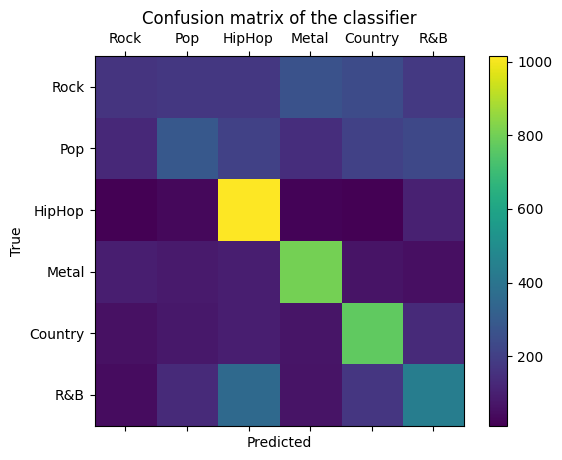

In [13]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd

y = tfIdf_df.pop('Genre')
X = tfIdf_df
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

#MULTINOMIAL NAIVE BAYES:
###############################################################################################
model = MultinomialNB().fit(X_train, y_train)
all_predictions = model.predict(X_test)


labels = ['Rock', 'Pop', 'HipHop', 'Metal', 'Country', 'R&B']
cm = confusion_matrix(y_test, all_predictions, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
################################################################################################

# ACCURACY SCORE: 1732/3600 =  48.11% accuracy for classification. (with 3000 samples (600 testing)) .20 testing
# ACCURACY SCORE: 2362/4800 = 49.21% accuracy for classification. (with 4000 samples (800 testing))  .20 testing
# ACCURACY SCORE: 3478/7200 = 48.31% accuracy for classification. (with 4000 samples (1200 testing))  .30 testing

